In [1]:
%load_ext cython
%matplotlib inline
import corner

In [2]:
%%cython
from hmc cimport *
from scipy.stats import multivariate_normal
import numpy as np
cimport numpy as np

cdef double corr = .8
cdef class correlatedGaussian(HMCSampler):
    cpdef double logProbability(self, double[:] x):
        # 2d gaussian, neglects constants
        # Mean 0,0, unit variance
        # The commented-out PDF is wrong somehow.  Not sure how though.
        # return -(x[0]**2 + x[1]**2 - 2*corr*x[0]*x[1])/(2*(1-corr**2))
        return multivariate_normal.pdf(x,np.zeros(2),np.array([[1,.8],[.8,1]]))
        
    
    cpdef void gradLogProbability(self, double[:] x, double[:] output):
        # Same deal
        output[0] = (2*x[0] - 2 * corr*x[1])/(2*(1-corr**2))
        output[1] = (2*x[1] - 2 * corr*x[0])/(2*(1-corr**2))
        return


In [3]:
f = correlatedGaussian(2,pi*.01)

In [ ]:
x,y = f.run(1000000,200,rand(2)).T

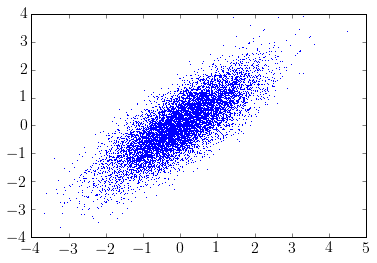

In [9]:
# x,y = f.recordTrajectory(zeros(2),array((rand(),rand())),100).T
x,y = f.run(10000,200,rand(2)).T
plot(x,y,',')

In [10]:
print mean(x), var(x), mean(y), var(y)

-0.00887230800074 0.981676623627 -0.0108509862573 1.00177886979


In [2]:
%%cython
from hmc cimport *
from hmc import Normal
import numpy as np
cimport numpy as np


cdef class tripleGaussian(HMCSampler):
    cpdef double logProbability(self, double[:] x):
        return (Normal.logPDF(x[0],4,.5) + Normal.logPDF(x[1],1,.8) + 
                Normal.logPDF(x[2],-3,2))
        
    
    cpdef void gradLogProbability(self, double[:] x, double[:] output):
        output[0] = Normal.dldm(x[0],4,.5)
        output[1] = Normal.dldm(x[1],1,.8)
        output[2] = Normal.dldm(x[2],-3,2.)
        return


In [3]:
from hmc import *
g = tripleGaussian(3,.05)

In [4]:
result = g.run(10000,100,array([5.,1,-1]),0)
# result = g.run(100000,200,rand(3))
# result = g.recordTrajectory(rand(3),rand(3),200)
print result

[[ 3.5803  0.7888 -5.6647]
 [ 3.4687  2.1383 -0.0452]
 [ 4.1944  2.1501 -5.5548]
 ..., 
 [ 3.744  -0.3409 -5.492 ]
 [ 4.5782  0.8463 -3.5928]
 [ 3.6695  1.0489  1.0945]]


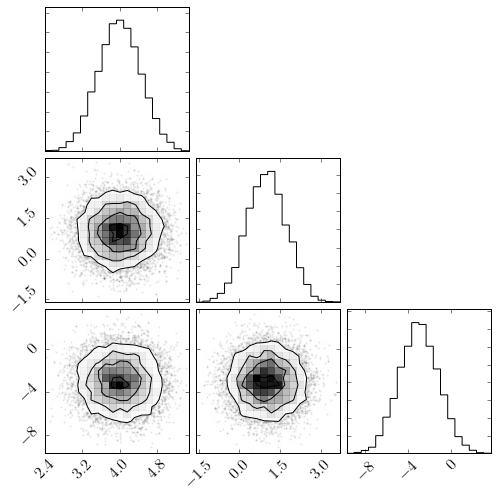

In [5]:
corner.corner(result);

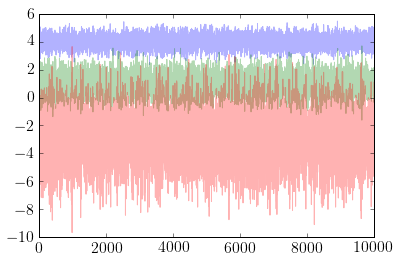

In [6]:
plot(result,alpha=.3)